In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv('Boston.csv')

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data=data.drop(['Unnamed: 0','zn','chas','nox','dis','rad','black','indus','age','tax'],axis=1)

In [5]:
data.head()

,crim,rm,ptratio,lstat,medv
0,0.00632,6.575,15.3,4.98,24.0
1,0.02731,6.421,17.8,9.14,21.6
2,0.02729,7.185,17.8,4.03,34.7
3,0.03237,6.998,18.7,2.94,33.4
4,0.06905,7.147,18.7,5.33,36.2


In [6]:
data.describe()

,crim,rm,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,18.455534,12.653063,22.532806
std,8.601545,0.702617,2.164946,7.141062,9.197104
min,0.006320,3.561000,12.600000,1.730000,5.000000
25%,0.082045,5.885500,17.400000,6.950000,17.025000
50%,0.256510,6.208500,19.050000,11.360000,21.200000
75%,3.677082,6.623500,20.200000,16.955000,25.000000
max,88.976200,8.780000,22.000000,37.970000,50.000000


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rm       506 non-null    float64
 1   ptratio  506 non-null    float64
 2   lstat    506 non-null    float64
 3   medv     506 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


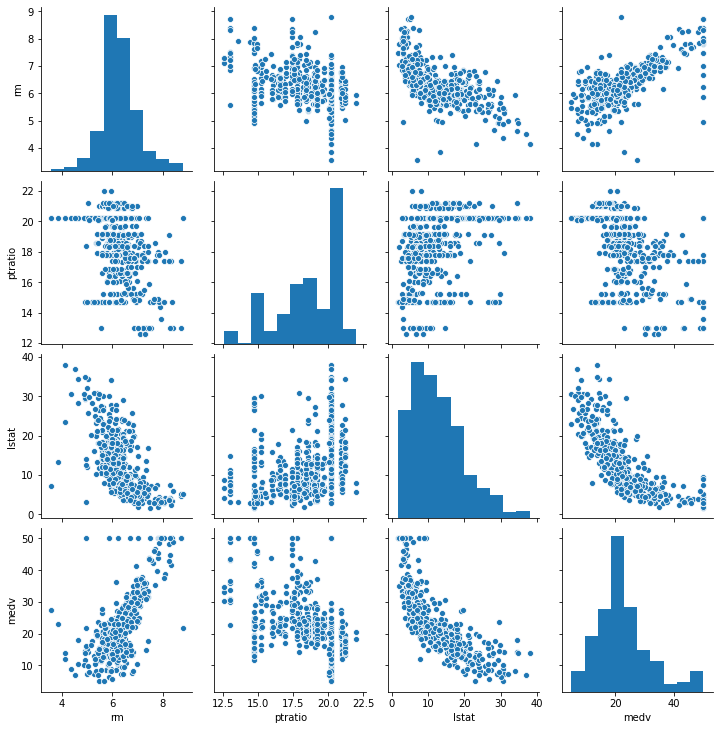

In [134]:
sns.pairplot(data)

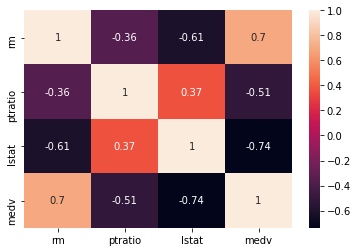

In [135]:
sns.heatmap(data.corr(),annot=True)

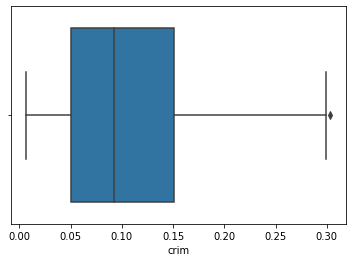

In [32]:
sns.boxplot(data['crim'])

In [33]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1

In [34]:
data=data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data.shape

(210, 5)

In [195]:
x=data[['crim','rm','ptratio','lstat']]
y=data['medv']

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

In [197]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
lr.coef_

array([ 2.36307244, -0.66407984, -0.57977981])

In [199]:
lr.intercept_

25.70244903478816

In [200]:
sa=pd.DataFrame(lr.coef_,x.columns,columns=['answer'])
sa

,answer
rm,2.363072
ptratio,-0.664080
lstat,-0.579780


In [206]:
lr.score(x_test,y_test)

0.6913071458754225

In [202]:
predictions=lr.predict(x_test)

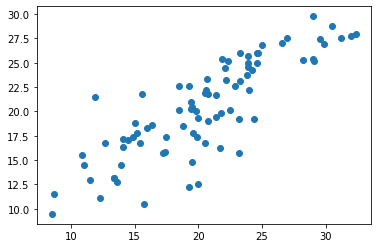

In [203]:
plt.scatter(y_test,predictions)

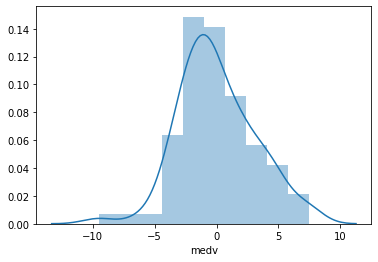

In [204]:
sns.distplot(y_test-predictions)

In [205]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  2.405225809673471
MSE:  9.437544881656924
RMSE:  3.072058736687325
